In [1]:
print("4,3,2,1,Ho jaye Shuru!!!")

4,3,2,1,Ho jaye Shuru!!!


In [2]:
from research_and_analyst.utils.model_loader import ModelLoader
model_loader = ModelLoader()

{"timestamp": "2025-10-14T15:48:46.150313Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2025-10-14T15:48:46.150313Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-14T15:48:46.150313Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-14T15:48:46.150313Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-14T15:48:46.150313Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-14T15:48:46.157314Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-14T15:48:46.159839Z", "level": "info", "event": "YAML config loaded"}


In [3]:
llm = model_loader.load_llm()

{"provider": "openai", "model": "gpt-4o", "timestamp": "2025-10-14T15:48:46.164221Z", "level": "info", "event": "Loading LLM"}


In [4]:
llm.invoke("Uactive?")

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content="Yes, I'm active! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb3c3cb84d', 'id': 'chatcmpl-CQbYV4Tuh24wmatdG5TZDTQX6ptv5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--65c2f242-de06-4b5d-9f25-1cf717661237-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [6]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver


In [7]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst")
    role: str = Field(description="Role of the analyst in the context of the topic")
    affiliation: str = Field(description="Primary affiliation of the analyst")
    description: str = Field(description="Description of the analyst focus, concerns and motives")

    @property
    def persona(self) ->str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [8]:
class Perspectives(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehenssive list of analysts with their roles and affiliations")

In [9]:
class GenerateAnalystState(TypedDict):
    topic: str # research topic
    max_analysts: int #number of analyst
    human_analyst_feedback: str #human feedback
    analysts: List[Analyst] # Analyst asking questions

In [10]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [11]:
print([analyst_instructions.format(
    topic="Astrology",
    max_analysts=4,
    human_analyst_feedback="Baisc astrology topics with astrophysics"
)] + ["Generate the set of analystics"])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAstrology\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nBaisc astrology topics with astrophysics\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analystics']


In [12]:
def create_analyst(state: GenerateAnalystState):
    """
    Fuction to create required analyst
    """

    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analayst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspectives)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analayst_feedback  
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts")])
    print("-*" * 50)
    print(analysts)
    print("-*" * 50)
    print(analysts.analysts[0])
    return {"analysts": analysts.analysts}

In [13]:
create_analyst(
    {'topic': 'astrology',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Orion', role='Astrological Historian', affiliation='Institute of Cosmic Studies', description="Dr. Celeste Orion focuses on the historical development of astrology and its impact on various cultures throughout history. She is particularly interested in how astrological beliefs have shaped societal norms and influenced decision-making processes in different eras. Her work aims to provide a comprehensive understanding of astrology's role in human history, separating myth from documented influence."), Analyst(name='Professor Leo Astra', role='Astrology and Psychology Researcher', affiliation='University of Metaphysical Sciences', description='Professor Leo Astra explores the psychological aspects of astrology, examining why people are drawn to astrological beliefs and how these beliefs affect their mental well-being. His research delves into the cognitiv

{'analysts': [Analyst(name='Dr. Celeste Orion', role='Astrological Historian', affiliation='Institute of Cosmic Studies', description="Dr. Celeste Orion focuses on the historical development of astrology and its impact on various cultures throughout history. She is particularly interested in how astrological beliefs have shaped societal norms and influenced decision-making processes in different eras. Her work aims to provide a comprehensive understanding of astrology's role in human history, separating myth from documented influence."),
  Analyst(name='Professor Leo Astra', role='Astrology and Psychology Researcher', affiliation='University of Metaphysical Sciences', description='Professor Leo Astra explores the psychological aspects of astrology, examining why people are drawn to astrological beliefs and how these beliefs affect their mental well-being. His research delves into the cognitive biases that may lead individuals to find personal meaning in astrological readings, as well a

In [14]:
def human_feedback(state: GenerateAnalystState):
    """ No-op node that should be interrupted on """
    pass

In [15]:
def should_continue(state: GenerateAnalystState):
    """ Return the next node to execute """
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END

# First Workflow

In [16]:
builder = StateGraph(GenerateAnalystState)

In [17]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback",human_feedback)

In [18]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                              should_continue,
                              ["create_analyst",
                               END])

In [19]:
memory = MemorySaver()

In [20]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

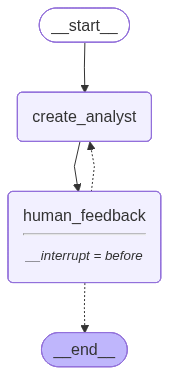

In [21]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [22]:
topic = "The benefit of astrology in modern world"

In [23]:
max_analysts = 2

In [24]:
thread = {"configurable": {"thread_id":1}}

In [25]:
for event in graph.stream({"topic":topic,
                           "max_analysts":max_analysts},
                           thread,
                           stream_mode="values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Nmae: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" *50)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Harmon', role='Astrology and Mental Health Researcher', affiliation='Institute of Psychological Sciences', description='Dr. Harmon focuses on the psychological benefits of astrology, particularly how it can be used as a tool for self-reflection and personal growth. She is interested in how astrology can provide individuals with a framework for understanding their emotions and behaviors, potentially leading to improved mental health outcomes. Her research explores the therapeutic aspects of astrology and its role in modern psychological practices.'), Analyst(name='Professor Leo Zhang', role='Cultural Studies Expert', affiliation='Department of Cultural Studies, Global University', description='Professor Zhang examines the cultural significance of astrology in the modern world, analyzing how it has been integrated into contemporary society and its impac

In [26]:
state = graph.get_state(thread)

In [27]:
state

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrology and Mental Health Researcher', affiliation='Institute of Psychological Sciences', description='Dr. Harmon focuses on the psychological benefits of astrology, particularly how it can be used as a tool for self-reflection and personal growth. She is interested in how astrology can provide individuals with a framework for understanding their emotions and behaviors, potentially leading to improved mental health outcomes. Her research explores the therapeutic aspects of astrology and its role in modern psychological practices.'), Analyst(name='Professor Leo Zhang', role='Cultural Studies Expert', affiliation='Department of Cultural Studies, Global University', description='Professor Zhang examines the cultural significance of astrology in the modern world, analyzing how it has been integrated into contemporary society and its impact on

In [28]:
state.values

{'topic': 'The benefit of astrology in modern world',
 'max_analysts': 2,
 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrology and Mental Health Researcher', affiliation='Institute of Psychological Sciences', description='Dr. Harmon focuses on the psychological benefits of astrology, particularly how it can be used as a tool for self-reflection and personal growth. She is interested in how astrology can provide individuals with a framework for understanding their emotions and behaviors, potentially leading to improved mental health outcomes. Her research explores the therapeutic aspects of astrology and its role in modern psychological practices.'),
  Analyst(name='Professor Leo Zhang', role='Cultural Studies Expert', affiliation='Department of Cultural Studies, Global University', description='Professor Zhang examines the cultural significance of astrology in the modern world, analyzing how it has been integrated into contemporary society and its impact on cultural identit

In [29]:
state.next

('human_feedback',)

In [30]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0a9154-e434-69b1-bfff-1575cce739cd': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-14T15:49:02.092536+00:00\xa2id\xd9$1f0a9154-e434-69b1-bfff-1575cce739cd\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.3877634396930908\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0a9154-e439-6817-8000-c5c80122dafd': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-14T15:49:02.094543+00:00\xa2id\xd9$1f0a9154-e439-6817-8000-c5c80122dafd\xb0channel_versions\x84\xa9__start__\xd9400000000000000000000000000000002.0.17831061276023508\xa5topic\xd9400000000000000000000000000000002.0.17831061276023508\xacmax_analysts\xd9400000000000000000000000000000002.0.17831061276023508\xb8branch:to:create_analyst\xd9400000000000000000000000000000002.0.17831061276023508\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start_

In [31]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a9155-239a-686a-8001-79c227ca78bd'}}

In [32]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from human mind that is affected by planet positions"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a9155-242e-6bb3-8002-1c6ea0d64533'}}

In [33]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Dr. Celeste Harmon
Affiliation: Institute of Psychological Sciences
Role: Astrology and Mental Health Researcher
Description: Dr. Harmon focuses on the psychological benefits of astrology, particularly how it can be used as a tool for self-reflection and personal growth. She is interested in how astrology can provide individuals with a framework for understanding their emotions and behaviors, potentially leading to improved mental health outcomes. Her research explores the therapeutic aspects of astrology and its role in modern psychological practices.
--------------------------------------------------
Name: Professor Leo Zhang
Affiliation: Department of Cultural Studies, Global University
Role: Cultural Studies Expert
Description: Professor Zhang examines the cultural significance of astrology in the modern world, analyzing how it has been integrated into contemporary society and its impact on cultural identity. He is particularly interested in the resurgence of astrology among 

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
analysts=[Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the potential for astrology to offer comfort and guidance in times of uncertainty.'), Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influenc

In [34]:
state = graph.get_state(thread)

In [35]:
state

StateSnapshot(values={'topic': 'The benefit of astrology in modern world', 'max_analysts': 2, 'human_analyst_feedback': 'add something from human mind that is affected by planet positions', 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the potential for astrology to offer comfort and guidance in times of uncertainty.'), Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern 

In [36]:
state.next

('human_feedback',)

In [37]:
state.values

{'topic': 'The benefit of astrology in modern world',
 'max_analysts': 2,
 'human_analyst_feedback': 'add something from human mind that is affected by planet positions',
 'analysts': [Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the potential for astrology to offer comfort and guidance in times of uncertainty.'),
  Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He invest

In [38]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [39]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [40]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a9155-58cd-6dbd-8006-e5af315f873a'}}

In [41]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)

()


In [42]:
analysts = final_state.values.get('analysts')

In [43]:
analysts

[Analyst(name='Dr. Celeste Harmon', role='Astrological Psychologist', affiliation='Institute of Cosmic Psychology', description='Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the potential for astrology to offer comfort and guidance in times of uncertainty.'),
 Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool

In [44]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Dr. Celeste Harmon
Affiliation: Institute of Cosmic Psychology
Role: Astrological Psychologist
Description: Dr. Celeste Harmon focuses on the psychological benefits of astrology in the modern world. She explores how planetary positions can influence human emotions and behaviors, providing insights into personal development and mental well-being. Her work aims to bridge the gap between traditional astrological beliefs and contemporary psychological practices, emphasizing the potential for astrology to offer comfort and guidance in times of uncertainty.
--------------------------------------------------
Name: Professor Leo Vega
Affiliation: University of New Age Studies
Role: Cultural Historian
Description: Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of a

# Second Workflow

In [45]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="langgraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [46]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

In [47]:
from langchain_community.utilities import GoogleSerperAPIWrapper
serper = GoogleSerperAPIWrapper()
serper.run("Why astrology is misunderstood?")

"The trouble with astrology is that it gives explanations or analysis of personality that can apply to almost anybody. It's Barnum effect. Try ... 11. Astrologists can't point out any new research in the past 3,000 years. A science with the scientific research is a misnamed endeavor. Astrology is about empowerment and awareness, not fate or fortune-telling. It's a tool that can offer profound insights into who you are and how you can grow. Science is based on what is observed. The only facts in astrology are that there are planets. The rest of it is entirely made up. It uses the ... Astrology largely exploits people's tendencies to buy into generic descriptions of themselves. Modern astrophycists have pointed out that, ... “Astrology is rubbish”, this is because there is no evidence that celestial objects can affect our lives, events and emotions in the way that is claimed. Astrology is a pseudoscience because it lacks scientific evidence, is not testable, doesn't refine ideas, and doe

In [48]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [49]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [50]:
tavily_search = TavilySearchResults()

C:\Users\shank\AppData\Local\Temp\ipykernel_14668\13742946.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults()


In [51]:
tavily_search.invoke("Astrology")

[{'title': 'Astrology - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Astrology',
  'content': 'Astrology is a range of divinatory practices, recognized as pseudoscientific since the 18th century, that propose that information about human affairs and terrestrial events may be discerned by studying the apparent positions of celestial objects. Different cultures have employed forms of astrology since at least the 2nd millennium BCE, these practices having originated in calendrical systems used to predict seasonal shifts and to interpret celestial cycles as signs of divine communications. [...] Throughout most of its history, astrology was considered a scholarly tradition. It was accepted in political and academic contexts, and was connected with other studies, such as astronomy, alchemy, meteorology, and medicine. At the end of the 17th century, new scientific concepts in astronomy and physics (such as heliocentrism and Newtonian mechanics) called astrology into question. Astrology

In [52]:
import operator
from typing import Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for send() API


class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval")

In [53]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [54]:
print(analyst.persona)

Name: Professor Leo Vega
Role: Cultural Historian
Affiliation: University of New Age Studies
Description: Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragmented world.



In [55]:
print(question_instructions.format(goals = analyst.persona))

You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.

2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: Name: Professor Leo Vega
Role: Cultural Historian
Affiliation: University of New Age Studies
Description: Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragme

In [56]:
def generation_question(state: InterviewState):
    """ Node to generate the questions"""

    # Get State
    analyst = state["analyst"]
    messages = state["messages"]

    #generate the question
    system_message = question_instructions.format( goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # return the question through state
    return {"messages": [question]}

In [57]:
print(analyst)

name='Professor Leo Vega' role='Cultural Historian' affiliation='University of New Age Studies' description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragmented world.'


In [58]:
class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for send() API

In [59]:
state = {"max_num_turns":2,"context":[], "analyst": analyst, "interview":"", "sections":[], "messages": [HumanMessage(content="Do the proper search according to the expertise")]}

In [60]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragmented world.'),
 'interview': '',
 'sections': [],
 'messages': [HumanMessage(content='Do the proper search according to the expertise', additional_kwargs={}, response_metadata={})]}

In [61]:
result = generation_question(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [62]:
result

{'messages': [AIMessage(content="Hello, Professor Vega. My name is Alex Thompson, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some specific examples of how astrology has influenced contemporary fashion trends?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 271, 'total_tokens': 330, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CQbZDFo8bkdImHOBEgh7cllOBT6W8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2116207a-405d-4676-8a87-0dfd030b49c3-0', usage_metadata={'input_tokens': 271

In [63]:
print(result["messages"][0].content)

Hello, Professor Vega. My name is Alex Thompson, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in today's world. Could you share some specific examples of how astrology has influenced contemporary fashion trends?


In [64]:
from langchain_core.messages import get_buffer_string

In [65]:
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert.
                                    Your goal is to generate a  well-structured query for use in retrieval and / or web search related to the conversation.
                                    First,, analyze the full conversation.
                                    Pay particular attention to the final question posed by the analyst.
                                    Convert this final question into a well-structured we search query 
                                    """ )

In [66]:
def search_web(state: InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions] + state["messages"])

    # Search
    search_docs = tavily_search.invoke(search_query.search_query)

    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )
    print("-tavily*" *50)
    return {"context": [formatted_search_docs]}

In [67]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vedic. My name is Clara Thompson, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in the modern world. To start, could you share an example of how astrology has been integrated into contemporary practices in a way that might surprise people?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 250, 'total_tokens': 321, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb3c3cb84d', 'id': 'chatcmpl-CQE5zx8Mxd42llAtk0wf0vUrGHiFT', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7aac7dcd-b116-4b88-9239-8cfeead6216a-0', usage_metadata={'input_tokens': 250, 'output_tokens': 71, 'total_tokens': 321, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [68]:
result = search_web(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


In [69]:
print(result["context"][0])

<Document href="https://www.researchgate.net/publication/383601645_The_Enduring_Influence_of_Celestial_Bodies_in_Modern_Astrological_Practices"/>
politics, health, and identity (Barton, 1994).

Especially in  the  context of  contemporary  spiritual  practices, astrology has  not only

survived but flourished in the modern period, despite the supremacy of scientific rationalism.

A  revitalized  interest  in  personal  spirituality,  self-discovery,  and  holistic  well-being  was

evident  in  the  20th-century  astrological  revival,  which  was  sparked  by  the  New  Age [...] forums  and  organizations  where  enthusiasts  discuss  and  share  insights  and  experiences.

Websites like Reddit and specialized astrology forums, which provide spaces for community

120

support, direction, and discussion, help to better integrate astrology into contemporary social

and cultural contexts (Parker, 2022).

3.9 Integration of Astrology with Personal Growth: Perspectives from Astronomy and

In [70]:
def search_serper(state: InterviewState):
    """
    Retrieve data from the web using serper
    """
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state["messages"])

    print("-serper*" *50)
    print(search_query)

    # Search
    search_docs = serper.run(search_query.search_query)

    return {"context": [search_docs]}


In [71]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vedic. My name is Clara Thompson, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in the modern world. To start, could you share an example of how astrology has been integrated into contemporary practices in a way that might surprise people?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 250, 'total_tokens': 321, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb3c3cb84d', 'id': 'chatcmpl-CQE5zx8Mxd42llAtk0wf0vUrGHiFT', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7aac7dcd-b116-4b88-9239-8cfeead6216a-0', usage_metadata={'input_tokens': 250, 'output_tokens': 71, 'total_tokens': 321, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [72]:
result = search_serper(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='modern integration of astrology in contemporary practices'


In [73]:
result["context"]

["Contemporary practices of astrology offer a version of spirituality ... Early astrological practices were also integrated into concepts ... by P Clements · 2020 · Cited by 15 — This speculative and interdisciplinary article about Western and UK astrology recognises a fluid craft steeped in pre-modern 'magical' symbolism. The integration of modern technology into astrology has bridged the gap between ancient wisdom and contemporary life, allowing users to access expert advice and ... This study provides insights into the persistence of astrology as a significant cultural and psychological force, offering a nuanced perspective ... At the heart of the contemporary astrological practices lies Omega Astro's approach, seamlessly blending ancient wisdom with cutting-edge ... Neither practice can be integrated into the other without first understanding what those worldviews are and how astrology functions in both. Astrology can be integrated by using zodiac signs, birth charts, aligning spel

In [74]:
from langchain_community.document_loaders import  ArxivLoader


In [ ]:
# def search_arxiv(state: InterviewState):
#     """
#     Retrieve data from the web
#     """
#     structure_llm = llm.with_structured_output(SearchQuery)
#     search_query = structure_llm.invoke([search_instructions] + state["messages"])

#     # Search
#     search_docs = ArxivLoader(search_query.search_query).load()

#     formatted_search_docs = "\n\n".join(doc.page_content[:1000] for doc in search_docs[:2]) or "No papers found"
#     print("-arxiv*" *50)
#     print(formatted_search_docs)

#     return {"context": [formatted_search_docs]}

In [111]:
import arxiv

def search_arxiv(state: InterviewState):
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions] + state["messages"])

    search = arxiv.Search(query=search_query.search_query, max_results=2)
    results = []
    for result in search.results():
        results.append(f"Title: {result.title}\nSummary: {result.summary}\nURL: {result.entry_id}")

    formatted_search_docs = "\n\n".join(results) or "No papers found"
    return {"context": [formatted_search_docs]}

In [112]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","messages":[AIMessage(content="Hello, Professor Vedic. My name is Clara Thompson, and I'm an analyst with a keen interest in cultural history and its modern implications. I'm fascinated by your work on the cultural and historical significance of astrology in the modern world. To start, could you share an example of how astrology has been integrated into contemporary practices in a way that might surprise people?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 250, 'total_tokens': 321, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb3c3cb84d', 'id': 'chatcmpl-CQE5zx8Mxd42llAtk0wf0vUrGHiFT', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7aac7dcd-b116-4b88-9239-8cfeead6216a-0', usage_metadata={'input_tokens': 250, 'output_tokens': 71, 'total_tokens': 321, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [113]:
result = search_arxiv(state)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_14668\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=integration+of+astrology+in+contemporary+practices+surprising+examples&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
Got first page: 1 of 2851614 total results
Sleeping: 2.997452 seconds
Requesting page (first: False, try: 0): https://export.arxiv.org/api/query?search_query=integration+of+astrology+in+contemporary+practices+surprising+examples&id_list=&sortBy=relevance&sortOrder=descending&start=1&max_results=100


In [114]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}.

Your goal is to answer a question posed by the interviewer.

To answer question, use this context:

{context}

When answering questions, follow these guidelines:

1. Use only the information provided in the context.

2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sorces at the topic of each individual document.

4. Include these sources in your answer next to any relevant statements. For example, for source # 1 use [1].

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc

6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list:

[1] assistant/docs/llama3_1.pdf, page 7

And skip the addition of the brackets as well as the Document source preamble in your citation

"""

In [115]:
def generate_answer(state:InterviewState):

    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # Name the message as coming from the expert
    answer.name = "expert"

    # Append it to state
    return {"messages":[answer]}

In [116]:
def route_messages(state: InterviewState,
                   name: str = "expert"):
    """ Route between question and answer """

    # Get messages
    messages = state["messages"]
    max_num_turns = state.get("max_num_turns", 2)

    # Check the number of expert answers
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return "save_interview"
    
    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]

    if "Thank You so much for your help" in last_question.content:
        return "save_interview"
    
    return "ask_question"

In [117]:
def save_interview(state: InterviewState):

    """Save Interviews """

    # Get messages
    messages = state["messages"]

    # Convert interview to a string
    interview = get_buffer_string(messages)

    # Save to interviews key
    return {"interview": interview}

In [118]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [119]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)] + [HumanMessage(content=f"Use this source to write your section: {context}")])

    # Append it to state
    return {"sections": [section.content]}

In [120]:
interview_builder = StateGraph(InterviewState)

In [121]:
interview_builder.add_node("ask_question", generation_question )
interview_builder.add_node("search_web", search_web )
interview_builder.add_node("search_serper", search_serper )
interview_builder.add_node("search_arxiv", search_arxiv )
interview_builder.add_node("generate_answer", generate_answer )
interview_builder.add_node("save_interview", save_interview )
interview_builder.add_node("write_section", write_section )

In [122]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_serper")
interview_builder.add_edge("ask_question","search_arxiv")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_serper","generate_answer")
interview_builder.add_edge("search_arxiv","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                                        route_messages,
                                        ["ask_question",
                                         "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [123]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct INterview")


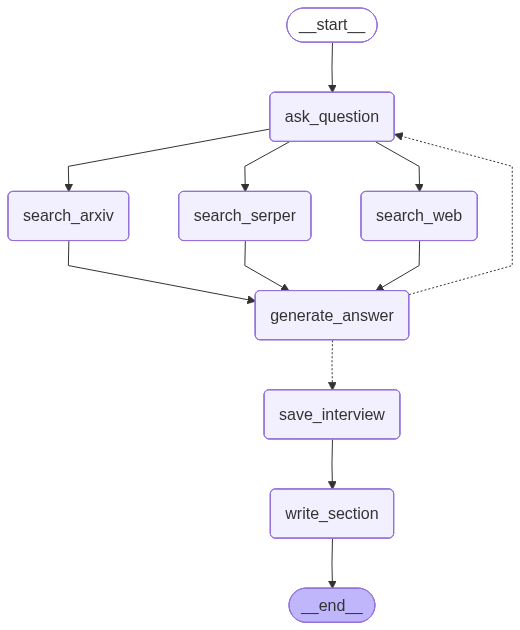

In [124]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [125]:
analyst

Analyst(name='Professor Leo Vega', role='Cultural Historian', affiliation='University of New Age Studies', description='Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragmented world.')

In [126]:
analyst.persona

'Name: Professor Leo Vega\nRole: Cultural Historian\nAffiliation: University of New Age Studies\nDescription: Professor Leo Vega examines the cultural and historical significance of astrology in the modern world. He investigates how astrology has been integrated into contemporary society, influencing everything from fashion to technology. His research highlights the enduring appeal of astrology as a tool for self-reflection and its role in shaping cultural identities. Professor Vega is particularly interested in how astrology can foster a sense of connection and community in an increasingly digital and fragmented world.\n'

In [127]:
thread = {"configurable": {"thread_id": "1"}}

In [128]:
from IPython.display import Markdown

In [132]:
messages = [HumanMessage("So you said you were writing an article on planetery position and it's effect on humans?")]

In [133]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*-serper*
search_query='planetary positions effects on humans astrology cultural significance'


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
C:\Users\shank\AppData\Local\Temp\ipykernel_14668\3150498081.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():
Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=planetary+positions+effect+on+humans+astrology+cultural+significance&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
Got first page: 100 of 2292768 total results


-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*-tavily*


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [134]:
Markdown(interview['sections'][0])

## The Enduring Influence of Astrology in Modern Culture

### Summary

Astrology, an ancient practice that interprets celestial movements to understand human behavior and predict events, continues to hold cultural and historical significance in the modern world. Despite the rise of scientific rationalism, astrology remains a popular tool for self-reflection and community building. Professor Leo Vega's research delves into the integration of astrology into contemporary society, highlighting its influence on various aspects of life, from fashion to technology.

Astrology's enduring appeal lies in its ability to provide a sense of connection and identity in an increasingly digital and fragmented world. It offers a framework for individuals to make sense of complex life situations, serving as a coping mechanism during times of uncertainty. This cultural phenomenon is not only a personal tool but also shapes societal trends and cultural identities.

1. The historical context of astrology reveals its deep roots in ancient civilizations, where it was intertwined with medicine, science, and philosophy. Physicians once believed that celestial positions influenced human health, and treatments were often prescribed based on astrological charts [1].
   
2. Astrology's role in community influence is significant, as it has shaped cultural and societal frameworks throughout history. The belief in the alignment of stars and planets influencing human affairs has transcended cultural boundaries, maintaining its relevance across different societies [2].

3. The practice of astrology involves understanding the influences of planetary alignments, which can encourage new ventures or suggest caution during unfavorable periods. This understanding of celestial phenomena provides insights into human behavior and decision-making processes [3].

4. Astrology's integration into modern culture is evident in its influence on fashion, technology, and even mental health. For instance, planetary movements are often associated with specific emotional energies, impacting mood and emotions. This connection between celestial movements and human emotions is a fascinating concept that continues to be explored [4].

5. Despite its mystical origins, astrology has adapted to contemporary society, offering a blend of tradition and modernity. It serves as a bridge between the past and present, allowing individuals to explore their identities and connect with others who share similar beliefs [5].

Professor Vega's research underscores the importance of astrology as a cultural and historical phenomenon that continues to shape modern society. Its ability to foster a sense of community and connection in a fragmented world highlights its enduring relevance and appeal.

### Sources
[1] https://www.centreofexcellence.com/the-history-of-astrology/  
[2] https://www.researchgate.net/publication/388642200_The_Significance_of_Planetary_Alignments_Astronomical_Cultural_and_Theological_Insights  
[3] https://joysauce.com/astrology-with-alice-when-planets-align/  
[4] https://fullmoonbehavioral.com/your-mental-health-and-astrology-how-the-movement-of-planets-and-the-moon-influence-mood-and-emotions/  
[5] https://www.reddit.com/r/AskAstrologers/comments/10mwtdd/how_is_it_possible_that_planets_have_an_influence/  